In [47]:
import pandas as pd
import numpy as np

In [48]:
df = pd.read_csv("./channel7.csv")

In [49]:
df = df[['Cycle', 'Discharge_Capacity(Ah)']]

In [50]:
knn_noise = np.random.normal(0, 10, len(df)) / 100
df['KNN'] = df['Discharge_Capacity(Ah)'] + df['Discharge_Capacity(Ah)'] * knn_noise

In [51]:
particle_filter_noise = np.random.normal(0, 7, len(df)-1) / 100
particle_filter_noise = np.insert(particle_filter_noise, 0, 0, axis=0)
df['Particle Filter'] = df['Discharge_Capacity(Ah)'] + df['Discharge_Capacity(Ah)'] * particle_filter_noise

In [52]:
particle_filter_noise = np.random.normal(0, 4, len(df)-1) / 100
particle_filter_noise = np.insert(particle_filter_noise, 0, 0, axis=0)
df['RVM'] = df['Discharge_Capacity(Ah)'] + df['Discharge_Capacity(Ah)'] * particle_filter_noise

In [53]:
particle_filter_noise = np.random.normal(0, 2, len(df)-1) / 100
particle_filter_noise = np.insert(particle_filter_noise, 0, 0, axis=0)
df['Neural Network'] = df['Discharge_Capacity(Ah)'] + df['Discharge_Capacity(Ah)'] * particle_filter_noise

In [54]:
new_column_name = {
    "Discharge_Capacity(Ah)": "True SOH"   
}
df.rename(columns=new_column_name, inplace=True)

In [55]:
df

,Cycle,True SOH,KNN,Particle Filter,RVM,Neural Network
0,1,2.286119,2.217408,2.286119,2.286119,2.286119
1,2,2.290558,2.285531,2.265842,2.379322,2.307836
2,3,2.307867,2.240975,2.281512,2.210202,2.364942
3,4,2.308050,1.878888,1.897676,2.337749,2.325076
4,5,2.318817,1.849695,2.123657,2.336932,2.311769
...,...,...,...,...,...,...
210,211,1.741465,2.021862,1.844932,1.755119,1.702001
211,212,1.757168,1.586662,1.748422,1.765350,1.794380
212,213,1.767168,1.873794,1.694187,1.732555,1.756859
213,214,1.734280,1.618697,1.620871,1.788904,1.725151


In [56]:
df['True SOH'] = df['True SOH'] / 3
df['KNN'] = df['KNN'] / 3
df['Particle Filter'] = df['Particle Filter'] / 3
df['Neural Network'] = df['Neural Network'] / 3
df['RVM'] = df['RVM'] / 3

In [57]:
df

,Cycle,True SOH,KNN,Particle Filter,RVM,Neural Network
0,1,0.762040,0.739136,0.762040,0.762040,0.762040
1,2,0.763519,0.761844,0.755281,0.793107,0.769279
2,3,0.769289,0.746992,0.760504,0.736734,0.788314
3,4,0.769350,0.626296,0.632559,0.779250,0.775025
4,5,0.772939,0.616565,0.707886,0.778977,0.770590
...,...,...,...,...,...,...
210,211,0.580488,0.673954,0.614977,0.585040,0.567334
211,212,0.585723,0.528887,0.582807,0.588450,0.598127
212,213,0.589056,0.624598,0.564729,0.577518,0.585620
213,214,0.578093,0.539566,0.540290,0.596301,0.575050


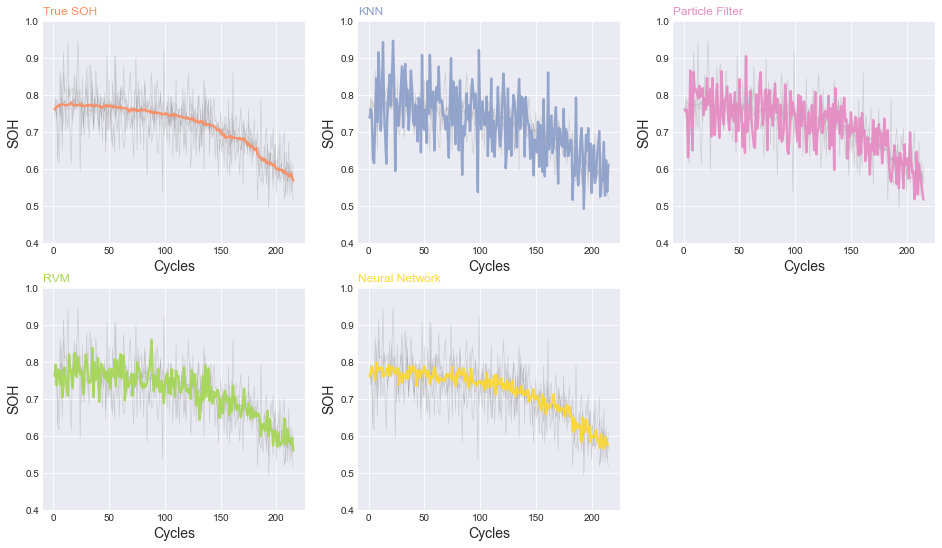

In [58]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Make a data frame
# df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14), 'y9': np.random.randn(10)+range(4,14) })
 
# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set2')

fig, ax = plt.subplots(figsize=(16,9))
 
# multiple line plot
num=0
for column in df.drop('Cycle', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(2,3, num)
 
    # plot every groups, but discreet
    for v in df.drop('Cycle', axis=1):
        plt.plot(df['Cycle'], df[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
 
    # Plot the lineplot
    plt.plot(df['Cycle'], df[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
    
    plt.xlabel('Cycles', fontsize=14)
    plt.ylabel('SOH', fontsize=14)

 
    # Same limits for everybody!
#     plt.xlim(0,10)
    plt.ylim(0.4,1)
 
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
 
# # general title
# plt.suptitle("How the 9 students improved\nthese past few days?", 
#              fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
 
# # Axis title
# plt.text(0.5, 0.02, 'Cycle', ha='center', va='center')
# plt.text(0.6, 0.5, 'Ah', ha='center', va='center', rotation='vertical')
#

In [59]:
from sklearn.metrics import mean_squared_error

In [61]:
cols = ['KNN', 'Particle Filter', 'RVM', 'Neural Network']

In [63]:
import numpy as np
for c in cols:
    print( f"{c}")
    print("{0:0.3f}".format(np.sqrt(mean_squared_error(df['True SOH'], df[c]))))


KNN
0.072
Particle Filter
0.053
RVM
0.029
Neural Network
0.013


In [65]:
import numpy as np
def max_err(y_true, y_predict):
    max_error_value = 0
    for y, y_hat in zip(y_true, y_predict):
        err = np.abs(y-y_hat)
        if err > max_error_value:
            max_error_value = err
            
    return "{0:0.3f}".format(max_error_value)

import numpy as np
for c in cols:
    print(f"{c}: {max_err(df['True SOH'], df[c])}")

KNN: 0.209
Particle Filter: 0.137
RVM: 0.106
Neural Network: 0.034


In [66]:
import numpy as np
def max_relatead_err(y_true, y_predict):
    max_error_value = 0
    for y, y_hat in zip(y_true, y_predict):
        err = np.abs(y-y_hat)/y
        if err > max_error_value:
            max_error_value = err
            
    return "{0:0.3f}".format(max_error_value)

import numpy as np
for c in cols:
    print(f"{c}: {max_relatead_err(df['True SOH'], df[c])}")

KNN: 0.280
Particle Filter: 0.179
RVM: 0.140
Neural Network: 0.053


In [67]:
import numpy as np
def averge_err(y_true, y_predict):
    max_error_value = 0
    for y, y_hat in zip(y_true, y_predict):
        err = np.abs(y-y_hat)/y
        if err > max_error_value:
            max_error_value = err
            
    return "{0:0.5f}".format(max_error_value/len(y_true))

import numpy as np
for c in cols:
    print(f"{c}: {averge_err(df['True SOH'], df[c])}")

KNN: 0.00130
Particle Filter: 0.00083
RVM: 0.00065
Neural Network: 0.00025
